<a href="https://colab.research.google.com/github/Kathryn-Hise/2kChickensV1Knight/blob/main/Chickens_vs_Santas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.core.numeric import zeros_like

In [9]:
santa0 = 18
chick0 = 200
santaFinal = 1
chickFinal = 0
timeend = 102-46 #seconds

The solver successfully reached the end of the integration interval.
nfev =  32


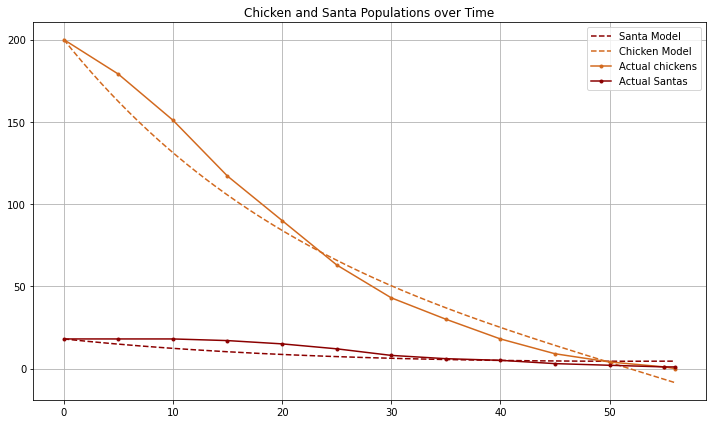

beta = 0.0035
alpha = 0.46


In [47]:
#p1 = santa, p2 = chickbattletime = timeend
chicklosses = chick0 - chickFinal 
santalosses = santa0 - santaFinal
beta = 0.0035 #santa loss per chick
alpha = 0.46 #chick loss per santa

def f(t,yvec):
  santapop = yvec[0]  # santaica 
  chickpop = yvec[1] #chickan
  return [-beta*chickpop, -alpha*santapop]

def santaloss(t,yvec):
  return yvec[0]

def chickloss(t,yvec):
  return yvec[1]

TMAX = timeend
y0 = [santa0, chick0] 
t = np.linspace(0, TMAX, num=261)
ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(santaloss,chickloss))
print(ivp.message)
print('nfev = ',ivp.nfev)
#t = ivp.t
santa = ivp.y[0]
chick = ivp.y[1]

#actual
cdata = np.array([200,179,151,117,90,63,43,30,18,9,4,1,0])
sdata = np.array([18,18,18,17,15,12,8,6,5,3,2,1,1])
tdata = np.array([46,51,56,61,66,71,76,81,86,91,96,101,102])
LENloop = len(tdata)
for i in range(LENloop):
  tdata[i] -= 46

plt.figure(figsize=(10,6))
plt.plot(t, santa,'--',color='darkred',label='Santa Model')
plt.title('Chicken and Santa Populations over Time')
plt.plot(t, chick,'r--',color='chocolate',label='Chicken Model')
plt.plot(tdata,cdata,'.-',color='chocolate',label="Actual chickens")
plt.plot(tdata,sdata,'.-',color='darkred',label='Actual Santas')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
print(f'beta = {beta}')
print(f'alpha = {alpha}')

In [48]:
#Error Finding
error = 0
error += abs(santa[240] - sdata[12])
error += abs(chick[240] - cdata[12])
error += abs(santa[180] - sdata[9])
error += abs(chick[180] - cdata[9])
error += abs(santa[140] - sdata[7])
error += abs(chick[140] - cdata[7])
error += abs(santa[60] - sdata[3])
error += abs(chick[60] - cdata[3] )
print(error)

52.08665487206345


Lowest Errors so far: 

beta = 0.0035,
alpha = 0.47 : Error 54.40720484775672


beta = 0.0035,
alpha = 0.46 : Error 52.08665487206345
